In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sbn
df = pd.read_csv('csv/new_dataset.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_month'] = df.job_posted_date.dt.strftime('%b')
df['job_posted_month_number'] = df['job_posted_date'].dt.month
df = df.drop(columns=df.columns[0])
# df.set_index('job_id')

In [7]:
df_us = df[(df['job_country']=='United States')].dropna(subset=['salary_year_avg'])
df_canada = df[(df['job_country']=='Canada')].dropna(subset=['salary_year_avg'])

In [8]:
us_job_title = df_us['job_title_short'].value_counts().index[:5].to_list()
canada_job_title = df_canada['job_title_short'].value_counts().index[:5].to_list()

In [9]:
top_skills_us = df_us[df_us['job_title_short'].isin(us_job_title)]
top_skills_canada = df_canada[df_canada['job_title_short'].isin(canada_job_title)]

In [10]:
canada_grouped_job_title = top_skills_canada.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
us_grouped_job_title = top_skills_us.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

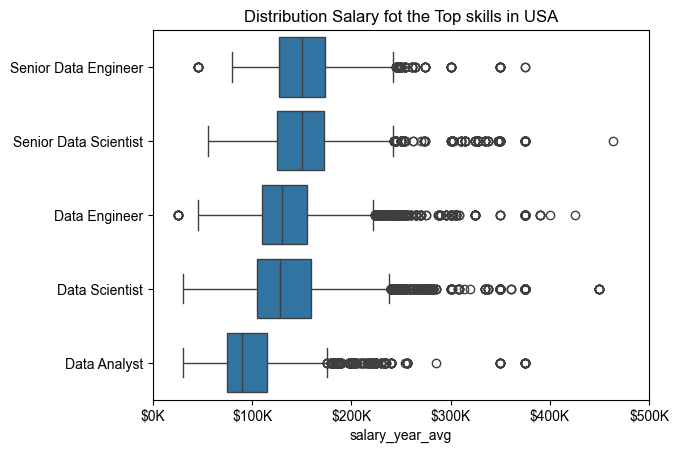

In [11]:
sbn.boxplot(data=top_skills_us, y='job_title_short', x='salary_year_avg', order=us_grouped_job_title)
sbn.set_theme(style='ticks')
plt.title('Distribution Salary fot the Top skills in USA')
ticks_x = plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.gca()
plt.xlim(0, 500000)
plt.ylabel('')
plt.show()


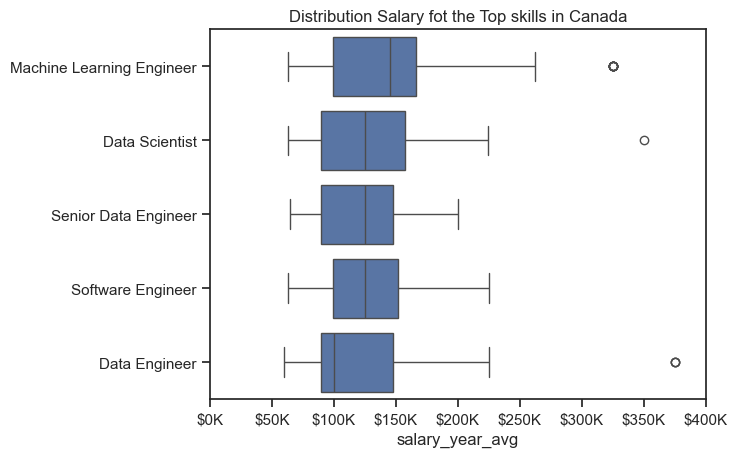

In [12]:
sbn.boxplot(data=top_skills_canada, y='job_title_short', x='salary_year_avg', order=canada_grouped_job_title)
sbn.set_theme(style='ticks')
plt.title('Distribution Salary fot the Top skills in Canada')
ticks_x = plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.ylabel('')
plt.xlim(0,400000)
plt.show()

In [13]:

canada_top_pay = df_canada.groupby('skills')['salary_year_avg'].agg(['count','median']).sort_values('median', ascending=False)

us_top_pay = df_us.groupby('skills')['salary_year_avg'].agg(['count','median']).sort_values('median', ascending=False)

In [14]:

canada_top_count = df_canada.groupby('skills')['salary_year_avg'].agg(['count','median']).sort_values('count', ascending=False)

us_top_count = df_us.groupby('skills')['salary_year_avg'].agg(['count','median']).sort_values('count', ascending=False)